<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Ahora, podemos analizar los datos de los clusters, para ver que características tienen y si podemos sacar alguna conclusión de ellos.</br>

A pesar de que el mejor modelo funciona con los datos crudos y con los datos categorizados procesador por OneHotEncoder, utilizando 2 clusteres, tenemos que tener en cuenta que el modelo nos retorna 1 cluster que tiene 1 solo elemento, por lo que no podemos sacar ninguna conclusión de él. Por lo tanto, vamos a utilizar el modelo que utiliza los datos crudos y con los datos categorizados procesador por OneHotEncoder pero 3 clusteres.
</div>

In [120]:
import pandas as pd
import numpy as np

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [123]:
valores_numéricos = [
    'Longitud título', 'Vistas', 'Suscriptores', 'Impresiones',
    'Longitud descripción', 'Descripción sentimiento positivo', 'Duración (segundos)', 'Cantidad de emojis en el título',
    'Cantidad de emojis en las descripción', 'Cantidad de hashtags en el título', 'Cantidad de hashtags en la descripción','Mes de publicación'
]

In [124]:
valores_categóricos = [
    'Categoría', 'Tipo de duración', 'Grupo de color familiar',
    'Temperatura', 'Celebración cercana (agrupado)', 'Países de celebración cercana',
    'Relación con festividad', 'Grupo Horario', 'Cuartiles (Mes)'
]

In [125]:
df = pd.read_csv('videos.csv')

In [126]:
# df.drop(columns=['R', 'G', 'B'], inplace=True)

In [127]:
onehot_encoder = OneHotEncoder()
valores_categóricos_normalizados = onehot_encoder.fit_transform(df[valores_categóricos])

In [128]:
df_transformado = np.hstack((df[valores_numéricos], valores_categóricos_normalizados.toarray()))
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df_transformado)

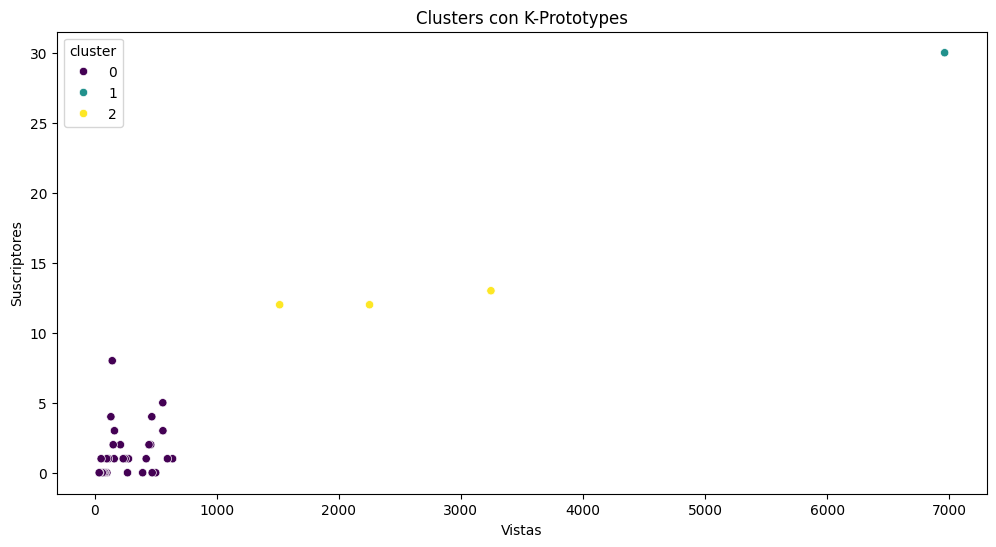

In [129]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Vistas', y='Suscriptores', hue='cluster', palette='viridis')
plt.title('Clusters con K-Prototypes')
plt.show()

In [130]:
silhouette = silhouette_score(df[valores_numéricos], df['cluster'])
calinski_harabasz = calinski_harabasz_score(df[valores_numéricos], df['cluster'])
davies_bouldin = davies_bouldin_score(df[valores_numéricos], df['cluster'])

In [131]:
print(f"Métricas del modelo:")
print(f"- Silueta: {silhouette:.3f}")
print(f"- Calinski-Harabasz: {calinski_harabasz:.3f}")
print(f"- Davies-Bouldin: {davies_bouldin:.3f}")

Métricas del modelo:
- Silueta: 0.828
- Calinski-Harabasz: 892.698
- Davies-Bouldin: 0.321


In [132]:
print("Información de los clusters:")
cluster_counts = df['cluster'].value_counts()

print("\nNúmero de elementos en cada cluster:")
print(cluster_counts)

Información de los clusters:

Número de elementos en cada cluster:
cluster
0    31
2     3
1     1
Name: count, dtype: int64


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Ahora podemos analizar cada cluster por separado, para ver que características tienen y si podemos sacar alguna conclusión de ellos.
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 0 (31 videos)
</div>

In [133]:
df.loc[df['cluster'] == 0].describe()

Longitud título      Vistas  Tiempo de reproducción (horas)  \
count        31.000000   31.000000                       31.000000   
mean         36.838710  267.032258                        3.999642   
std          17.226137  192.368654                        5.084263   
min          10.000000   38.000000                        0.190800   
25%          27.000000  100.500000                        1.460050   
50%          34.000000  212.000000                        2.506900   
75%          47.500000  453.000000                        3.983400   
max          71.000000  639.000000                       25.614500   

       Suscriptores  Duración Promedio (Seg)   Impresiones  \
count     31.000000                31.000000     31.000000   
mean       1.451613                52.612903   3012.225806   
std        1.822795                39.114087   4048.887985   
min        0.000000                16.000000    235.000000   
25%        0.000000                20.000000    480.000000   
50%        1.000000                40.000000    986.000000   
75%        2.000000                77.500000   3995.500000   
max        8.000000               144.000000  16064.000000   

       Longitud descripción  Descripción sentimiento positivo  \
count             31.000000                         31.000000   
mean             589.387097                          0.073979   
std              438.464645                          0.039857   
min               25.000000                          0.000000   
25%              159.500000                          0.048451   
50%              615.000000                          0.076667   
75%              841.500000                          0.093915   
max             1664.000000                          0.177083   

       Descripción sentimiento objetivo  Duración (segundos)  \
count                         31.000000            31.000000   
mean                           0.875725           184.677419   
std                            0.057635           147.454261   
min                            0.781977            25.000000   
25%                            0.839167            46.000000   
50%                            0.875000           199.000000   
75%                            0.894615           284.500000   
max                            1.000000           462.000000   

       Cantidad de emojis en el título  Cantidad de emojis en las descripción  \
count                        31.000000                              31.000000   
mean                          1.161290                               3.709677   
std                           0.522607                               3.195763   
min                           1.000000                               1.000000   
25%                           1.000000                               1.000000   
50%                           1.000000                               2.000000   
75%                           1.000000                               5.000000   
max                           3.000000                              11.000000   

       Cantidad de hashtags en el título  \
count                          31.000000   
mean                            1.161290   
std                             0.454369   
min                             1.000000   
25%                             1.000000   
50%                             1.000000   
75%                             1.000000   
max                             3.000000   

       Cantidad de hashtags en la descripción           R           G  \
count                               31.000000   31.000000   31.000000   
mean                                 7.064516   89.516129   90.741935   
std                                  5.118173   80.303952   69.737588   
min                                  1.000000    9.000000   12.000000   
25%                                  5.000000   26.000000   34.500000   
50%                                  6.000000   53.000000   63.000000   
75%             

In [134]:
df.loc[df['cluster'] == 0]

ID                                   Título del video  \
4   oTU_xrW4AXI        Would You Rather... Hardest Choices Edition   
5   LeVzouFBmzU                         Would you rather… Olympics   
6   9o2NvXVnNXk  Would You Rather ... 5 Tough Choices! 🤯 #short...   
7   Bt62oT9YD5o  Halloween SPECIAL EDITION Choose one button: Y...   
8   HINQqOrQfyU                                         Birds Quiz   
9   UrQgZlRx5XE  Would you rather... Olympics 2024 Moments #oly...   
10  9gmTfQtWPJM      Would You Rather...? 🚀 Space Edition! #Shorts   
11  wic0IkHb6VE                                         Euros quiz   
12  qve0bhKccpo                                     Euros Quiz  #2   
13  wV0mpy-nLUU           Euros 2024  - Spain vs France Semi-final   
14  yN1uoxZQVaU  Would You Rather ..? | Fantasy Vacation 🧙✨💭 | ...   
15  jMFoaRWq69Q  Would You Rather ..? | Disney Parks   🏰 🎢  🧚 |...   
16  dX356EC2A5c  Inside Out 2 | Quiz #quizforkids #funquiz #ins...   
17  RfK1eP5MYS4                 Would you Rather... Summer Edition   
18  cwCilNVm9xM                       Name the Flower | Facts Quiz   
19  OnMe42DH1Hg                      Water Cycle Quiz | Facts Quiz   
20  N8slYIa5RvM                Planets and Space Quiz | Facts Quiz   
21  SNreqswmZMc   Test Your Bird Knowledge With This Calming Quiz!   
22  pYJs4-WVFnU                   Flags Quiz for Kids | Facts Quiz   
23  CIWCru78WiY                  Animal Quiz for Kids | Facts Quiz   
24  ZD3y4s0dIvo                       Quiz Olympics 2 | Facts Quiz   
25  8If3ForRc5M                    African Flags Quiz | Facts Quiz   
26  awfFDzfLjiU            Capitals of the World Quiz | Facts Quiz   
27  KQCPikSx6dc                      Women in History | Facts Quiz   
28  Bw-ynQMMN7g           Can You Name These Iconic HORROR MOVIES?   
29  0-pH13n590k  Would You Rather | Taylor Swift #swifties #wou...   
30  2eNWSMedga0    Design Your DREAM HALLOWEEN House Room by Room?   
31  NsTkNf5WT_8                                  MLB All-Star Game   
32  7rijZHQNbq0                         Olympics Quiz | Short Quiz   
33  vA-UdP3913k                                    Friday Pop Quiz   
34  _ESSB71MDag                                       Planets Quiz   

    Longitud título  Vistas  Tiempo de reproducción (horas)  Suscriptores  \
4                43     639                         25.6145             1   
5                26     597                          3.9218             1   
6                63     560                          3.1657             3   
7                58     559                         11.9006             5   
8                10     501                          2.8208             0   
9                71     472                          2.3085             0   
10               45     469                          3.0233             4   
11               10     460                          2.6591             2   
12               14     446                          2.0956             2   
13               40     423                          1.8886             1   
14               64     394                         12.0380             0   
15               65     278                          6.1208             1   
16               53     270                          1.4671             0   
17               34     251                          9.5292             1   
18               28     235                          6.6207             1   
19               29     212                          6.2374             2   
20               35     163                          4.0450             3   
21               48     161                          2.6999             1   
22               32     153                          2.5069             2   
23               33     145                          2.3205             8   
24               28     134                          1.9721             4   
25               31     114                          0.8850             1   
2

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 0 Descripción (Conclusión):</br>
 hola</div>

</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 1 (1 video)
</div>

In [135]:
df.loc[df['cluster'] == 1].describe()

Longitud título  Vistas  Tiempo de reproducción (horas)  Suscriptores  \
count              1.0     1.0                           1.000           1.0   
mean              26.0  6961.0                          91.856          30.0   
std                NaN     NaN                             NaN           NaN   
min               26.0  6961.0                          91.856          30.0   
25%               26.0  6961.0                          91.856          30.0   
50%               26.0  6961.0                          91.856          30.0   
75%               26.0  6961.0                          91.856          30.0   
max               26.0  6961.0                          91.856          30.0   

       Duración Promedio (Seg)  Impresiones  Longitud descripción  \
count                      1.0          1.0                   1.0   
mean                      47.0     268415.0                1078.0   
std                        NaN          NaN                   NaN   
min                       47.0     268415.0                1078.0   
25%                       47.0     268415.0                1078.0   
50%                       47.0     268415.0                1078.0   
75%                       47.0     268415.0                1078.0   
max                       47.0     268415.0                1078.0   

       Descripción sentimiento positivo  Descripción sentimiento objetivo  \
count                          1.000000                          1.000000   
mean                           0.064607                          0.894663   
std                                 NaN                               NaN   
min                            0.064607                          0.894663   
25%                            0.064607                          0.894663   
50%                            0.064607                          0.894663   
75%                            0.064607                          0.894663   
max                            0.064607                          0.894663   

       Duración (segundos)  Cantidad de emojis en el título  \
count                  1.0                              1.0   
mean                 200.0                              1.0   
std                    NaN                              NaN   
min                  200.0                              1.0   
25%                  200.0                              1.0   
50%                  200.0                              1.0   
75%                  200.0                              1.0   
max                  200.0                              1.0   

       Cantidad de emojis en las descripción  \
count                                    1.0   
mean                                    11.0   
std                                      NaN   
min                                     11.0   
25%                                     11.0   
50%                                     11.0   
75%                                     11.0   
max                                     11.0   

       Cantidad de hashtags en el título  \
count                                1.0   
mean                                 1.0   
std                                  NaN   
min                                  1.0   
25%                                  1.0   
50%                                  1.0   
75%                                  1.0   
max                                  1.0   

       Cantidad de hashtags en la descripción     R      G      B  \
count                                     1.0   1.0    1.0    1.0   
mean                                      6.0  53.0  186.0  216.0   
std                                       NaN   NaN    NaN    NaN   
min                                       6.0  53.0  186.0  216.0   
25%                                       6.0  53.0  186.0  216.0   
50%                                       6.0  53.0  186.0  216.0   
75%                                       6.0  53.0  186.0  216.0   
max                 

In [136]:
df.loc[df['cluster'] == 1]

ID            Título del video  Longitud título  Vistas  \
0  nvWDAXOJRlE  Olympics Quiz | Facts Quiz               26    6961   

   Tiempo de reproducción (horas)  Suscriptores  Duración Promedio (Seg)  \
0                          91.856            30                       47   

   Impresiones          Categoría  \
0       268415  Deportes y Juegos   

                                         Descripción  ...  \
0  Hey Kids! Ready for an Olympic adventure? Welc...  ...   

   Fecha de publicación  Mes de publicación  Cuartiles (Mes)  \
0             21/6/2024                   6               Q2   

   Fecha antes del proximo video Suscriptores (entre fechas)  \
0                      26/6/2024                           2   

                Celebración cercana  Celebración cercana (agrupado)  \
0  Summer Olympics Opening Ceremony                 Summer Olympics   

  Países de celebración cercana  Relación con festividad cluster  
0                            US                     True       1  

[1 rows x 42 columns]

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 1 Descripción (Conclusión):</br>
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 2 (3 videos)
</div>

In [137]:
df.loc[df['cluster'] == 2].describe()

Longitud título       Vistas  Tiempo de reproducción (horas)  \
count         3.000000     3.000000                        3.000000   
mean         44.000000  2338.000000                       63.873467   
std          16.822604   868.200438                       49.012646   
min          25.000000  1516.000000                       27.717500   
25%          37.500000  1884.000000                       35.981100   
50%          50.000000  2252.000000                       44.244700   
75%          53.500000  2749.000000                       81.951450   
max          57.000000  3246.000000                      119.658200   

       Suscriptores  Duración Promedio (Seg)   Impresiones  \
count      3.000000                 3.000000      3.000000   
mean      12.333333                93.666667  43637.666667   
std        0.577350                45.081408  19678.984332   
min       12.000000                44.000000  32272.000000   
25%       12.000000                74.500000  32276.000000   
50%       12.000000               105.000000  32280.000000   
75%       12.500000               118.500000  49320.500000   
max       13.000000               132.000000  66361.000000   

       Longitud descripción  Descripción sentimiento positivo  \
count              3.000000                          3.000000   
mean            1021.333333                          0.079789   
std               37.819748                          0.007682   
min              999.000000                          0.071839   
25%              999.500000                          0.076098   
50%             1000.000000                          0.080357   
75%             1032.500000                          0.083764   
max             1065.000000                          0.087171   

       Descripción sentimiento objetivo  Duración (segundos)  \
count                          3.000000             3.000000   
mean                           0.866305           283.333333   
std                            0.003931            32.624122   
min                            0.863095           264.000000   
25%                            0.864113           264.500000   
50%                            0.865132           265.000000   
75%                            0.867911           293.000000   
max                            0.870690           321.000000   

       Cantidad de emojis en el título  Cantidad de emojis en las descripción  \
count                              3.0                               3.000000   
mean                               1.0                               8.000000   
std                                0.0                               4.582576   
min                                1.0                               3.000000   
25%                                1.0                               6.000000   
50%                                1.0                               9.000000   
75%                                1.0                              10.500000   
max                                1.0                              12.000000   

       Cantidad de hashtags en el título  \
count                                3.0   
mean                                 1.0   
std                                  0.0   
min                                  1.0   
25%                                  1.0   
50%                                  1.0   
75%                                  1.0   
max                                  1.0   

       Cantidad de hashtags en la descripción           R           G  \
count                                     3.0    3.000000    3.000000   
mean                                      3.0  145.000000   64.333333   
std                                       2.0   97.872366   61.231800   
min                                       1.0   32.000000   27.000000   
25%                                       2.0  116.000000   29.000000   
50%                                       3.0  200.000000   31.000000   
75%    

In [138]:
df.loc[df['cluster'] == 2]

ID                                   Título del video  \
1  8EWRh-nRfxg  Harry Potter EXPERTS Only! Tricky Questions Ah...   
2  G6gSSwpW0XA  The Most Difficult Flag Quiz Ever (Can You Get...   
3  KO-I3woc1zA                          Harry Potter | Facts Quiz   

   Longitud título  Vistas  Tiempo de reproducción (horas)  Suscriptores  \
1               50    3246                        119.6582            13   
2               57    2252                         27.7175            12   
3               25    1516                         44.2447            12   

   Duración Promedio (Seg)  Impresiones                         Categoría  \
1                      132        66361      Películas, Series y Fantasía   
2                       44        32280  Trivia y Cuestionarios Generales   
3                      105        32272      Películas, Series y Fantasía   

                                         Descripción  ...  \
1  Think you're a Harry Potter expert? Test your ...  ...   
2  Are you ready to put your knowledge of world f...  ...   
3  The Ultimate Harry Potter Quiz: How Well Do Yo...  ...   

   Fecha de publicación  Mes de publicación  Cuartiles (Mes)  \
1             12/9/2024                   9               Q3   
2             27/9/2024                   9               Q3   
3             15/8/2024                   8               Q3   

   Fecha antes del proximo video Suscriptores (entre fechas)  \
1                      19/9/2024                           5   
2                      2/10/2024                           7   
3                      15/8/2024                           0   

  Celebración cercana  Celebración cercana (agrupado)  \
1        National Day                    National Day   
2        National Day                    National Day   
3    Independence Day                Independence Day   

  Países de celebración cercana  Relación con festividad cluster  
1                            MX                    False       2  
2                      CN,SG,HK                    False       2  
3                            IN                    False       2  

[3 rows x 42 columns]

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 2 Descripción (Conclusión):</br>
</div>